# Importing the required models

In [1]:
!pip install --upgrade scikit-learn
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
# from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import Callback, ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.callbacks import Callback , ReduceLROnPlateau , ModelCheckpoint, CSVLogger
from sklearn.metrics import cohen_kappa_score, accuracy_score
from tensorflow.keras.losses import categorical_crossentropy as logloss
from tensorflow.keras.metrics import categorical_accuracy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from PIL import Image
import scipy
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import json

     |████████████████████████████████| 22.3MB 3.2MB/s 
ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.5.0 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.17.4 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.24.2 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


# Reading the dataset

In [2]:
base_path = '/kaggle/input/deepfake-dataset-merged/'
print("hello i an mear dataset")
def plot_img(base_path, set_):
    dir_ = os.path.join(base_path, 'train', set_)
    k = 0
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    fig.suptitle(set_ + 'Faces')
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

hello i an mear dataset


hello a am near plot fake and real images


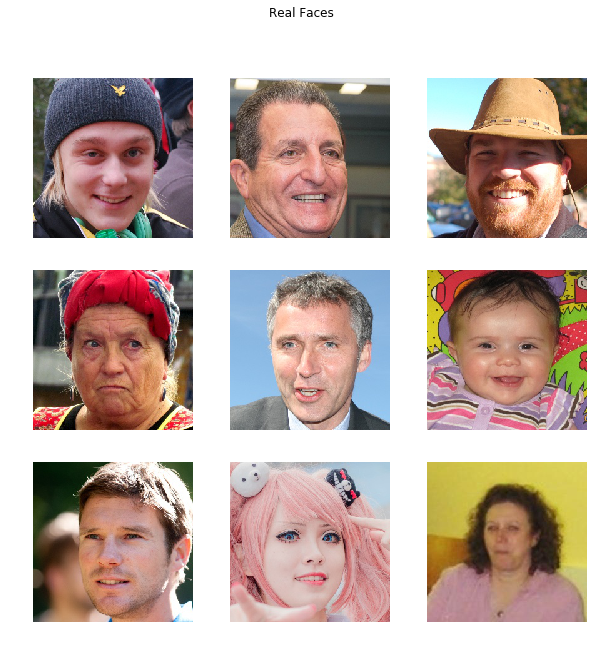

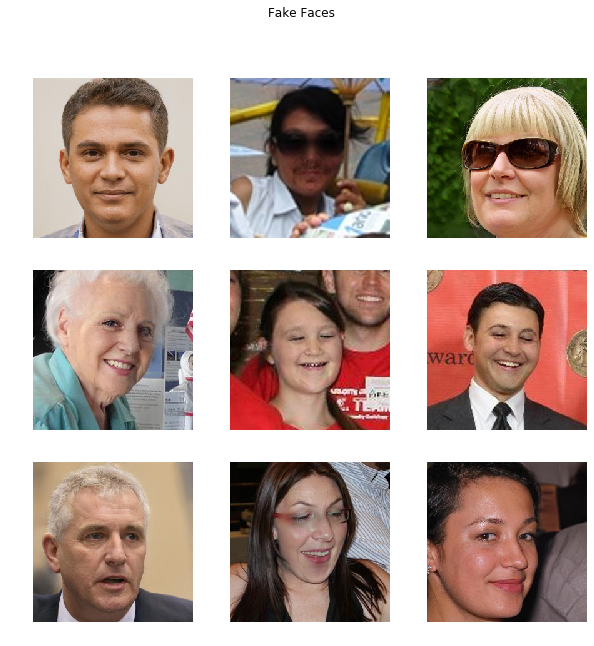

In [3]:
print("hello a am near plot fake and real images")
plot_img(base_path, 'Real').show()
plot_img(base_path, 'Fake').show()

# Preprocessing the data

In [4]:
ig = ImageDataGenerator(rescale=1./255.)
train_flow = ig.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

ig1 = ImageDataGenerator(rescale=1./255.)

valid_flow = ig1.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_flow = ig.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='categorical'
)

train_flow.class_indices

Found 248002 images belonging to 2 classes.
Found 60428 images belonging to 2 classes.
Found 31905 images belonging to 2 classes.


{'Fake': 0, 'Real': 1}

# Defining the model

In [5]:
model1=keras.applications.MobileNet(input_shape=(224, 224, 3),weights="imagenet",include_top=False)
model1.trainable=True
def build_model():
    inputs=Input(shape=(224, 224, 3))
    model = Sequential([inputs,
                        model1,
                        layers.GlobalAveragePooling2D(),
                        layers.Dense(1024,activation='relu'),
                        layers.BatchNormalization(),
                        layers.Dense(512,activation='relu'),
                        layers.BatchNormalization(),
                        layers.Dense(2, activation='softmax')
                        ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    return model

17227776/17225924 [==============================] - 0s 0us/step


In [6]:
print("hello i am building model")
model=build_model()
print("hello i am printing model summary")
model.summary()

hello i am building model
hello i am printing model summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
______________________________________________________________

# Specifying model parameters

In [7]:
checkpoint = ModelCheckpoint(filepath='model2.weights.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss',
                             save_weights_only=True
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=3, 
                              verbose=1, 
                              min_delta=0.0001
                             )
csv_logger = CSVLogger('training2.log')
es = EarlyStopping(monitor='val_loss', mode='min',patience=5)
callbacks = [checkpoint, reduce_lr, csv_logger,es]

# Training the model

In [8]:
train_steps = 100000//64
valid_steps = 20000//64

history = model.fit(train_flow,
    epochs = 50,
    steps_per_epoch =train_steps,
    validation_data =valid_flow,
    validation_steps = valid_steps,
    callbacks=callbacks
)

Train for 1562 steps, validate for 312 steps
Epoch 1/50
1561/1562 [============================>.] - ETA: 0s - loss: 0.1379 - accuracy: 0.9467
Epoch 00001: val_loss improved from inf to 1.11021, saving model to model2.weights.h5
1562/1562 [==============================] - 1247s 798ms/step - loss: 0.1378 - accuracy: 0.9467 - val_loss: 1.1102 - val_accuracy: 0.7757
Epoch 2/50
1561/1562 [============================>.] - ETA: 0s - loss: 0.0688 - accuracy: 0.9731
Epoch 00002: val_loss improved from 1.11021 to 0.38147, saving model to model2.weights.h5
1562/1562 [==============================] - 795s 509ms/step - loss: 0.0688 - accuracy: 0.9731 - val_loss: 0.3815 - val_accuracy: 0.8955
Epoch 3/50
1561/1562 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9785
Epoch 00003: val_loss improved from 0.38147 to 0.14676, saving model to model2.weights.h5
1562/1562 [==============================] - 676s 433ms/step - loss: 0.0568 - accuracy: 0.9784 - val_loss: 0.1468 - val_

# Plotting accuracy and loss

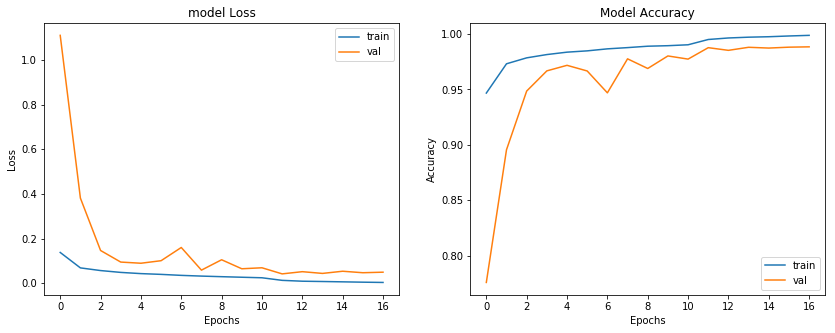

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
y_pred = model.predict(test_flow)

y_test = test_flow.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /opt/conda/lib/python3.6/site-packages
Requires: scipy, numpy, joblib, threadpoolctl
Required-by: yellowbrick, Wordbatch, vecstack, umap-learn, tsfresh, TPOT, sklearn, sklearn-pandas, sklearn-contrib-py-earth, shap, scikit-plot, scikit-optimize, scattertext, rgf-python, revrand, pysal, PDPbox, mlxtend, mapclassify, lime, lightgbm, librosa, kmodes, kmeans-smote, kmapper, imbalanced-learn, hypertools, hpsklearn, hmmlearn, hep-ml, heamy, gplearn, featuretools, fastFM, fancyimpute, eli5, dask-ml, dask-glm, chainer-chemistry, cesium, category-encoders, catalyst, Boruta, bayesian-optimization, allennlp, nolearn


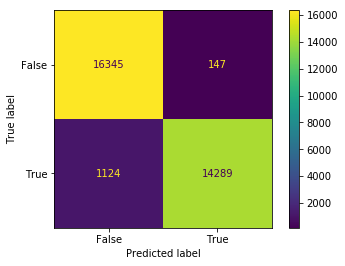

In [11]:
!pip show scikit-learn
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred_labels)
confusion_matrix

Fake=False
Real=True
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [Fake, Real])

cm_display.plot()
plt.show()

In [12]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred_labels))
print("AP Score:", metrics.average_precision_score(y_test, y_pred_labels))
print()
print(metrics.classification_report(y_test, y_pred_labels))
_, accu = model.evaluate(test_flow)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

ROC AUC Score: 0.9590805674481347
AP Score: 0.9528638500067432

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     16492
           1       0.99      0.93      0.96     15413

    accuracy                           0.96     31905
   macro avg       0.96      0.96      0.96     31905
weighted avg       0.96      0.96      0.96     31905

31905/31905 [==============================] - 202s 6ms/step - loss: 0.2933 - accuracy: 0.9602
Final Test Acccuracy = 96.016


# Testing on a random image

[0]
Fake Face


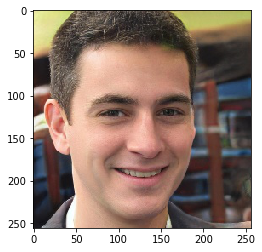

In [13]:
import PIL
from PIL import Image
im1 = Image.open('/kaggle/input/deepfake-dataset-merged/valid/Fake/03W1TOXADG.jpg')
im2=im1.resize((224,224))
p1 = np.array(im2)
p1=p1/255
plt.imshow(im1)
p1 = np.expand_dims(p1, axis=0)
p1.shape

op=np.argmax(model.predict(p1),axis=-1)
print(op)
if op== [0]:
    print('Fake Face')
else:
    print("Real Face")